<a href="https://colab.research.google.com/github/skeleton111222/Convert-MNIST-dataset-to-other-file-extension/blob/main/Convert_MNIST_dataset_to_txt_json_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **txt**

In [1]:
import numpy as np
from torchvision import datasets
from torchvision.transforms import Resize

# Parameters
IMAGES_PER_DIGIT = 10
TARGET_SIZE = (10, 10)

IMAGE_FILE = "mnist_images.txt"
LABEL_FILE = "mnist_labels.txt"

# Load MNIST
mnist = datasets.MNIST(root="./data", train=True, download=True)

digit_count = {i: 0 for i in range(10)}
images_column = []
labels_column = []

resize = Resize(TARGET_SIZE)

# Select 100 images (10 per digit)
for img, label in mnist:
    if digit_count[label] < IMAGES_PER_DIGIT:
        # Resize to 10x10
        img = resize(img)

        # Convert to numpy
        img = np.array(img, dtype=np.float32)

        # Normalize to [-1, 1]
        img = 2 * (img / 255.0) - 1

        # Flatten and append pixel-by-pixel (ONE COLUMN)
        for pixel in img.flatten():
            images_column.append(pixel)

        # Save label (ONE COLUMN)
        labels_column.append(label)

        digit_count[label] += 1

    if sum(digit_count.values()) == 100:
        break

# Save images (10000 x 1)
np.savetxt(IMAGE_FILE, np.array(images_column), fmt="%.5f")

# Save labels (100 x 1)
np.savetxt(LABEL_FILE, np.array(labels_column), fmt="%d")

print("Saved files:")
print(f"{IMAGE_FILE}  -> {len(images_column)} rows, 1 column")
print(f"{LABEL_FILE}  -> {len(labels_column)} rows, 1 column")


100%|██████████| 9.91M/9.91M [00:00<00:00, 41.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.0MB/s]


Saved files:
mnist_images.txt  -> 10000 rows, 1 column
mnist_labels.txt  -> 100 rows, 1 column


# **json**

In [ ]:
from tensorflow.keras.datasets import mnist
import json

(x_train, y_train), _ = mnist.load_data()

data = []
for i in range(100):  # START SMALL (100 images)
    data.append({
        "label": int(y_train[i]),
        "pixels": x_train[i].flatten().tolist()
    })

with open("mnist_small.json", "w") as f:
    json.dump(data, f)

print("Saved mnist_small.json")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Saved mnist_small.json


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

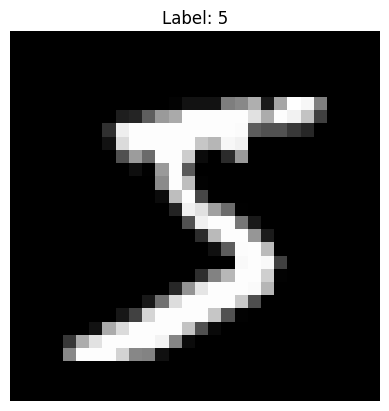

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")


# **csv**

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from skimage.transform import resize
import csv

# Load MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Downscale to 10x10
def downscale_10x10(image):
    return resize(image, (10, 10), anti_aliasing=True) * 255  # 0-255 range

# Normalize pixels to [-1, 1]
def normalize_pixel(value):
    return (value / 127.5) - 1

# Process first 5 images as example
for img_index, img in enumerate(train_images[:5]):
    img_small = downscale_10x10(img).flatten()
    img_normalized = [normalize_pixel(pix) for pix in img_small]

    # --- Save TXT ---
    with open(f"image_{img_index}_2col.txt", "w") as f:
        for idx, val in enumerate(img_normalized):
            f.write(f"{idx} {val:.5f}\n")

    # --- Save CSV ---
    with open(f"image_{img_index}_2col.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["pixel_index", "normalized_value"])  # header
        for idx, val in enumerate(img_normalized):
            writer.writerow([idx, f"{val:.5f}"])

print("Done! TXT and CSV files created for each image.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Done! TXT and CSV files created for each image.
